# Milestones 2 (Phase 1)


# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement :
-        Memprediksi kemungkinan pasien menderita diabetes atau tidak di Pima Indian yang tinggal di daerah Phoenix, Arizona, Amerika Serikat.


Objective : 
-       Untuk mengidentifikasi faktor-faktor risiko yang berkontribusi pada terjadinya diabetes pada populasi Pima Indian yang tinggal di daerah Phoenix, Arizona. Variabel "outcome" pada dataset ini menunjukkan apakah pasien tersebut menderita diabetes atau tidak. Dalam analisis dataset ini, tujuan utama adalah untuk mempelajari hubungan antara faktor-faktor risiko tertentu dan kemungkinan seseorang terkena diabetes, serta untuk mengembangkan model prediksi yang dapat membantu mengidentifikasi pasien yang berisiko tinggi terkena diabetes. Dengan demikian, analisis dataset ini dapat membantu dalam upaya mencegah diabetes dan meningkatkan pengobatan bagi mereka yang telah didiagnosis dengan penyakit ini.


Latar belakang :
-       Diabetes mellitus atau diabetes adalah penyakit kronis yang terjadi ketika kadar gula (glukosa) dalam darah seseorang terlalu tinggi. Kadar gula yang terlalu tinggi dapat menyebabkan berbagai komplikasi yang serius, termasuk masalah kesehatan jangka panjang seperti kerusakan saraf, kerusakan ginjal, kerusakan mata, dan bahkan kematian. Diabetes terjadi ketika tubuh tidak bisa memproduksi atau menggunakan hormon insulin dengan baik, yang biasanya membantu mengatur kadar gula dalam darah.
-       Menurut International Diabetes Federation, pada tahun 2021, diperkirakan terdapat 537 juta orang dewasa yang hidup dengan diabetes di seluruh dunia, dan jumlah ini diperkirakan akan meningkat menjadi 642 juta pada tahun 2040. Diabetes juga menjadi penyebab utama kematian di seluruh dunia, dengan diperkirakan 4,2 juta kematian akibat diabetes pada tahun 2019.
-       Dataset Pima Indians Diabetes merupakan database yang digunakan untuk mengidentifikasi faktor-faktor risiko yang berkontribusi pada terjadinya diabetes pada populasi kelompok etnis Pima Indian yang tinggal di daerah Phoenix, Arizona, Amerika Serikat. Pima Indian adalah salah satu suku pribumi Amerika yang memiliki sejarah yang kaya dan unik. Mereka tinggal di daerah Arizona selatan dan Meksiko utara selama berabad-abad sebelum datangnya para penjajah Eropa. Populasi Pima Indian telah menjadi fokus penelitian medis karena memiliki tingkat kejadian diabetes yang sangat tinggi dibandingkan dengan populasi lainnya. 
-       Pima Indians Diabetes adalah sebuah dataset medis yang berisi informasi tentang 768 pasien Pima Indian perempuan yang berusia 21 tahun atau lebih dan tinggal di Phoenix, Arizona, AS. Dataset ini dikumpulkan oleh National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) dan berisi informasi tentang berbagai faktor risiko yang dapat mempengaruhi kemungkinan seseorang terkena diabetes, seperti usia, BMI, tekanan darah, riwayat keluarga, dan sebagainya. Setiap baris dalam dataset mewakili seorang pasien, dan terdiri dari 8 variabel numerik dan 1 variabel kategorikal yang menunjukkan apakah pasien tersebut menderita diabetes atau tidak. Variabel numerik meliputi jumlah kehamilan yang dialami pasien, konsentrasi glukosa darah pasien, tekanan darah diastolik dan sistolik pasien, ketebalan lipatan kulit trisep pasien, massa tubuh pasien, indeks massa tubuh (BMI) pasien, dan usia pasien. Penggunaan dataset ini dapat membantu meningkatkan pemahaman kita tentang penyakit diabetes dan mengembangkan strategi pencegahan dan pengobatan yang lebih efektif.


# II. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [1]:
# Library untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data library
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import SMOTE

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [2]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?', 'NaN', 'nan']
df = pd.read_csv('../ms2/h8dsft_P1M2_dayuima.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [3]:
# Menampilkan semua kolom pada 10 baris dataset teratas
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Menampilkan 10 baris dataset terakhir
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(768, 9)

- Dataset Pima Indian Diabetes ini terdiri dari 768 baris dan 9 kolom.

In [6]:
# Memeriksa informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


        Dataset Pima Indian Diabetes terdiri dari 9 kolom dengan 8 variabel fitur dan 1 variabel target. Berikut penjelasan dari kesembilan kolom tersebut sebagai berikut:
- Pregnancies pada dataset Pima Indians Diabetes menjelaskan tentang jumlah kehamilan yang pernah dialami oleh seorang wanita. Nilai ini dapat berkisar antara 0 hingga 17, tergantung pada jumlah kehamilan yang pernah dialami oleh subjek.
- Glucose pada dataset Pima Indians Diabetes menjelaskan tentang kadar glukosa dalam darah (glukosa plasma puasa) dari seorang individu. Nilai ini diukur dalam satuan miligram per desiliter (mg/dL). Kadar glukosa dalam darah sangat penting dalam memantau kesehatan seseorang, terutama dalam diagnosa diabetes mellitus. Individu dengan kadar glukosa tinggi cenderung memiliki risiko yang lebih tinggi untuk terkena diabetes dan komplikasi kesehatan yang terkait.
- Blood Pressure pada dataset Pima Indians Diabetes menjelaskan tentang tekanan darah sistolik dan diastolik seorang individu yang diukur dalam milimeter air raksa (mmHg). Tekanan darah adalah salah satu parameter penting dalam menilai kesehatan dan diagnosa berbagai penyakit. Tekanan darah tinggi (hipertensi) merupakan faktor risiko utama untuk terkena diabetes dan penyakit kardiovaskular. Tekanan darah sistolik adalah tekanan darah saat jantung berkontraksi, sedangkan tekanan darah diastolik adalah tekanan darah saat jantung beristirahat.
- Skin Thickness pada dataset Pima Indians Diabetes menjelaskan tentang ketebalan lipatan kulit trisep (triceps skinfold thickness) seorang individu  yang diukur dalam satuan milimeter (mm). Ketebalan lipatan kulit trisep yang tinggi menandakan persentase lemak tubuh yang lebih tinggi sehingga dapat digunakan dalam pemodelan untuk memprediksi kemungkinan seseorang terkena diabetes berdasarkan komposisi tubuh mereka.
- Insulin pada dataset Pima Indians Diabetes menjelaskan tentang kadar insulin dalam plasma darah seorang individu yang diukur dalam satuan mikro unit per mililiter (μU/mL). Nilai Insulin yang tinggi dapat menunjukkan resistensi insulin, yaitu kondisi di mana sel tubuh tidak merespons insulin dengan baik sehingga kadar insulin dalam darah meningkat. Resistensi insulin sering terjadi pada individu dengan obesitas dan merupakan faktor risiko penting untuk terkena diabetes.
- BMI (Body Mass Index) pada dataset Pima Indians Diabetes menjelaskan tentang indeks massa tubuh (BMI) seorang individu yang merepresentasikan rasio antara berat badan dan tinggi badan seseorang, yang digunakan sebagai indikator umum untuk menentukan apakah seseorang memiliki berat badan yang sehat atau tidak. Nilai BMI dihitung dengan membagi berat badan dalam kilogram dengan tinggi badan dalam meter kuadrat (kg/m^2).
- Diabetes Pedigree Function pada dataset Pima Indians Diabetes menjelaskan tentang seberapa besar risiko seorang individu terkena diabetes berdasarkan riwayat keluarga mereka yang diukur dalam satuan "fungsi diabetes turun-temurun". Nilai Diabetes Pedigree Function dihitung berdasarkan informasi tentang riwayat keluarga, termasuk jumlah anggota keluarga yang terkena diabetes dan seberapa dekat hubungan mereka dengan individu yang diuji. Semakin tinggi nilai Diabetes Pedigree Function, semakin tinggi risiko terkena diabetes.
- Age : Usia pasien (tahun).
- Outcome : Kelas 1 menunjukkan orang dengan diabetes dan kelas 0 tidak memiliki diabetes atau hidup sehat.

In [7]:
# Rename semua nama kolom menjadi huruf kecil semua
df.rename(columns=str.lower, inplace=True)

In [8]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(0, 9)

- Tidak terdapat adanya data duplikasi pada dataset Pima Indian Diabetes

# IV. Exploratory Data Analysis (EDA)

- Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, pengelompokan, visualisasi sederhana, dan sebagainya.
- Dikutip dari medium.com, Exploratory Data Analysis (EDA) merupakan bagian dari proses data science. EDA sangat penting sebelum melakukan feature engineering dan modeling karena pada tahap ini kita harus memahami data terlebih dahulu.
- Untuk EDA, saya sajikan beberapa visualisasi histogram dan visualisasi untuk informasi data kategorik berupa diagram batang dan diagram lingkaran.

In [9]:
# Menghitung jumlah orang yang terkena diabetes dengan yang tidak
df.outcome.value_counts().sort_values(ascending = False)

0    500
1    268
Name: outcome, dtype: int64

<AxesSubplot: xlabel='outcome', ylabel='count'>

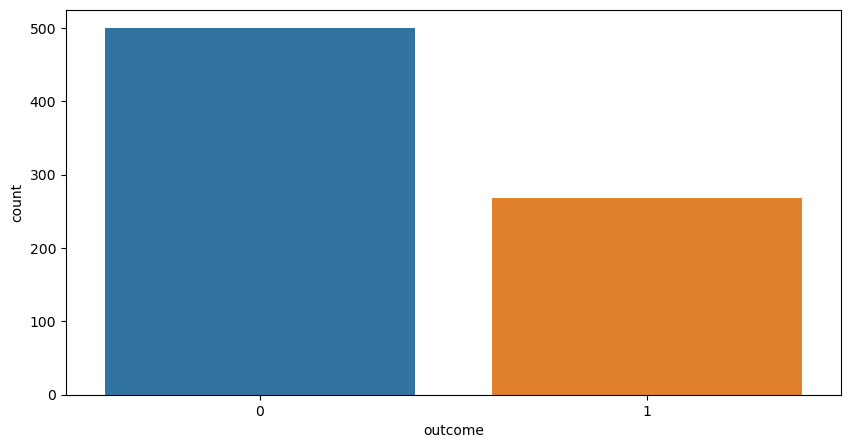

In [10]:
# Membuat plot untuk kolom outcome
plt.figure(figsize=(10,5))
sns.countplot(x = 'outcome', data = df)

<AxesSubplot: >

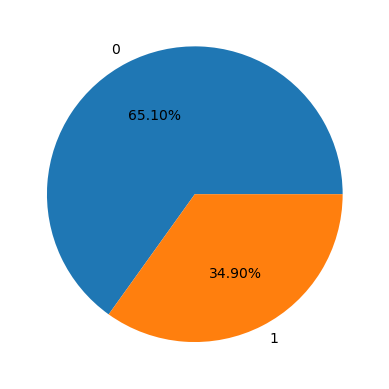

In [11]:
# Mencari persentase dari outcome dengan nilai 0 dan 1
df.groupby('outcome').size().plot(kind='pie', autopct='%.2f%%', ylabel='')

- Berdasarkan hasil tabel dan diagram diatas menunjukkan bahwa terdapat 500 data observasi dengan nilai 0 dan 268 data obeservasi dengan nilai 1. Artinya, jumlah pasien yang tidak memiliki diabetes atau hidup sehat lebih banyak dibandingkan jumlah pasien yang memiliki diabetes pada dataset ini.
- Visualisasi ini dapat membantu kita memahami seberapa banyak pasien yang mengalami diabetes (outcome 1) dan seberapa banyak pasien yang tidak mengalami diabetes (outcome 0) dalam dataset Pima Indians Diabetes 
- Berdasarkan visualisasi tersebut, menunjukkan bahwa kelas 0 lebih dominan sebesar 65,10%, yang berarti pasien tidak menderita diabetes atau hidup sehat di mana kadar gula darah pada tubuh pasien normal. Sementara itu, visualisasi kelas 1 lebih kecil sebesar 34,9%, yang berarti pasien menderita diabetes di mana kadar gula darah pada tubuh pasien sangat tinggi.

In [12]:
# Melihat jumlah pasien pregnancies pada dataset
df.groupby('pregnancies')[['pregnancies']].value_counts()

pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

- Jumlah wanita yang tidak hamil/belum pernah hamil (0) merupakan jumlah sampel tertinggi dengan 111 orang
- Data Pregnancies dapat digunakan dalam analisis untuk memperkirakan risiko terkena diabetes pada wanita. Informasi tentang jumlah kehamilan pada dataset Pima Indians Diabetes Database dapat digunakan dalam pemodelan untuk memprediksi kemungkinan seorang wanita terkena diabetes berdasarkan riwayat kehamilan mereka. Dalam dataset Pima Indians Diabetes Database, Pregnancies diukur dalam satuan "jumlah kehamilan". Semakin tinggi nilai Pregnancies, semakin banyak jumlah kehamilan yang pernah dialami oleh subjek wanita.

In [13]:
# Melihat jumlah outcome berdasarkan pregnancies
df.groupby('pregnancies')[['outcome']].value_counts()

pregnancies  outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            1           25
             0           20
8            1           22
             0           16
9            1           18
             0           10
10           0           14
             1           10
11           1            7
             0            4
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
dtype: int64

- Jika dilihat dari data diatas pasien yang belum pernah hamil merupakan pasien yang menderita diabetes paling banyak dari yang lainnya terdapat 38 pasien.
- Dan berdasarkan data wanita yang baru pernah hamil sekali memiliki angka paling besar untuk orang yang tidak menderita diabetes

<AxesSubplot: xlabel='pregnancies', ylabel='count'>

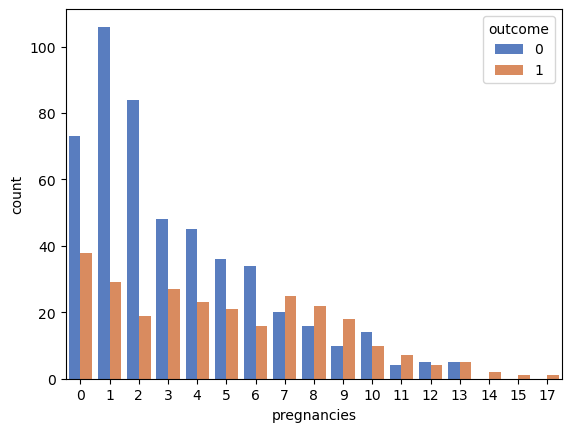

In [14]:
# Memvisualisasikan dataset outcome dengan pregnancies
sns.countplot(x='pregnancies', data=df,hue="outcome", palette="muted")  

- Berdasarkan visualisasi diatas terlihat bahwa pregnancies 7,8,9,11 memiliki jumlah orang yang menderita diabetes lebih tinggi dari yang tidak menderita diabetes
- Visualisasi di atas menampilkan distribusi jumlah pasien diabetes berdasarkan jumlah kehamilan (pregnancies), dengan membedakan pasien yang mengalami outcome 1 (diabetes) dan 0 (tidak diabetes).
- Dalam visualisasi tersebut, sumbu x menunjukkan jumlah kehamilan (pregnancies), sedangkan sumbu y menunjukkan jumlah pasien diabetes. Bar dengan warna biru menunjukkan jumlah pasien yang tidak mengalami diabetes (outcome 0), sedangkan bar dengan warna oranye menunjukkan jumlah pasien yang mengalami diabetes (outcome 1).
- Dari visualisasi tersebut, kita dapat melihat bahwa jumlah pasien yang mengalami diabetes (outcome 1) cenderung lebih tinggi pada pasien dengan jumlah kehamilan antara 0-4, kemudian cenderung menurun pada pasien dengan jumlah kehamilan yang lebih tinggi. Sedangkan jumlah pasien yang tidak mengalami diabetes (outcome 0) cenderung lebih tinggi pada pasien dengan jumlah kehamilan yang lebih tinggi, kemudian menurun pada pasien dengan jumlah kehamilan yang lebih sedikit.

In [15]:
# Menampilkan outcome 0 pada dataset 5 teratas berdasarkan umur pasien
df.loc[df['outcome'] == 0, ['age', 'outcome']].value_counts().sort_values(ascending=False).head()

age  outcome
22   0          61
21   0          58
24   0          38
25   0          34
23   0          31
dtype: int64

- Menampilakan data pasien yang tidak menderita diabetes 5 tertinggi berdasarkan usia pasien. Dapat dilihat bahwa usia 21-25 merupakan data pasien tertinggi yang tidah menderita penyakit diabetes

In [16]:
# Menampilkan outcome 1 pada dataset 5 teratas berdasarkan umur pasien
df[df['outcome'] == 1].groupby('age')['outcome'].value_counts().sort_values(ascending=False).head()

age  outcome
25   1          14
29   1          13
41   1          13
31   1          13
43   1          11
Name: outcome, dtype: int64

- Menampilakan data pasien yang  terkena diabetes 5 tertinggi berdasarkan usia pasien. Dapat dilihat bahwa usia 25,29,31,41,43 merupakan data pasien tertinggi yang menderita penyakit diabetes

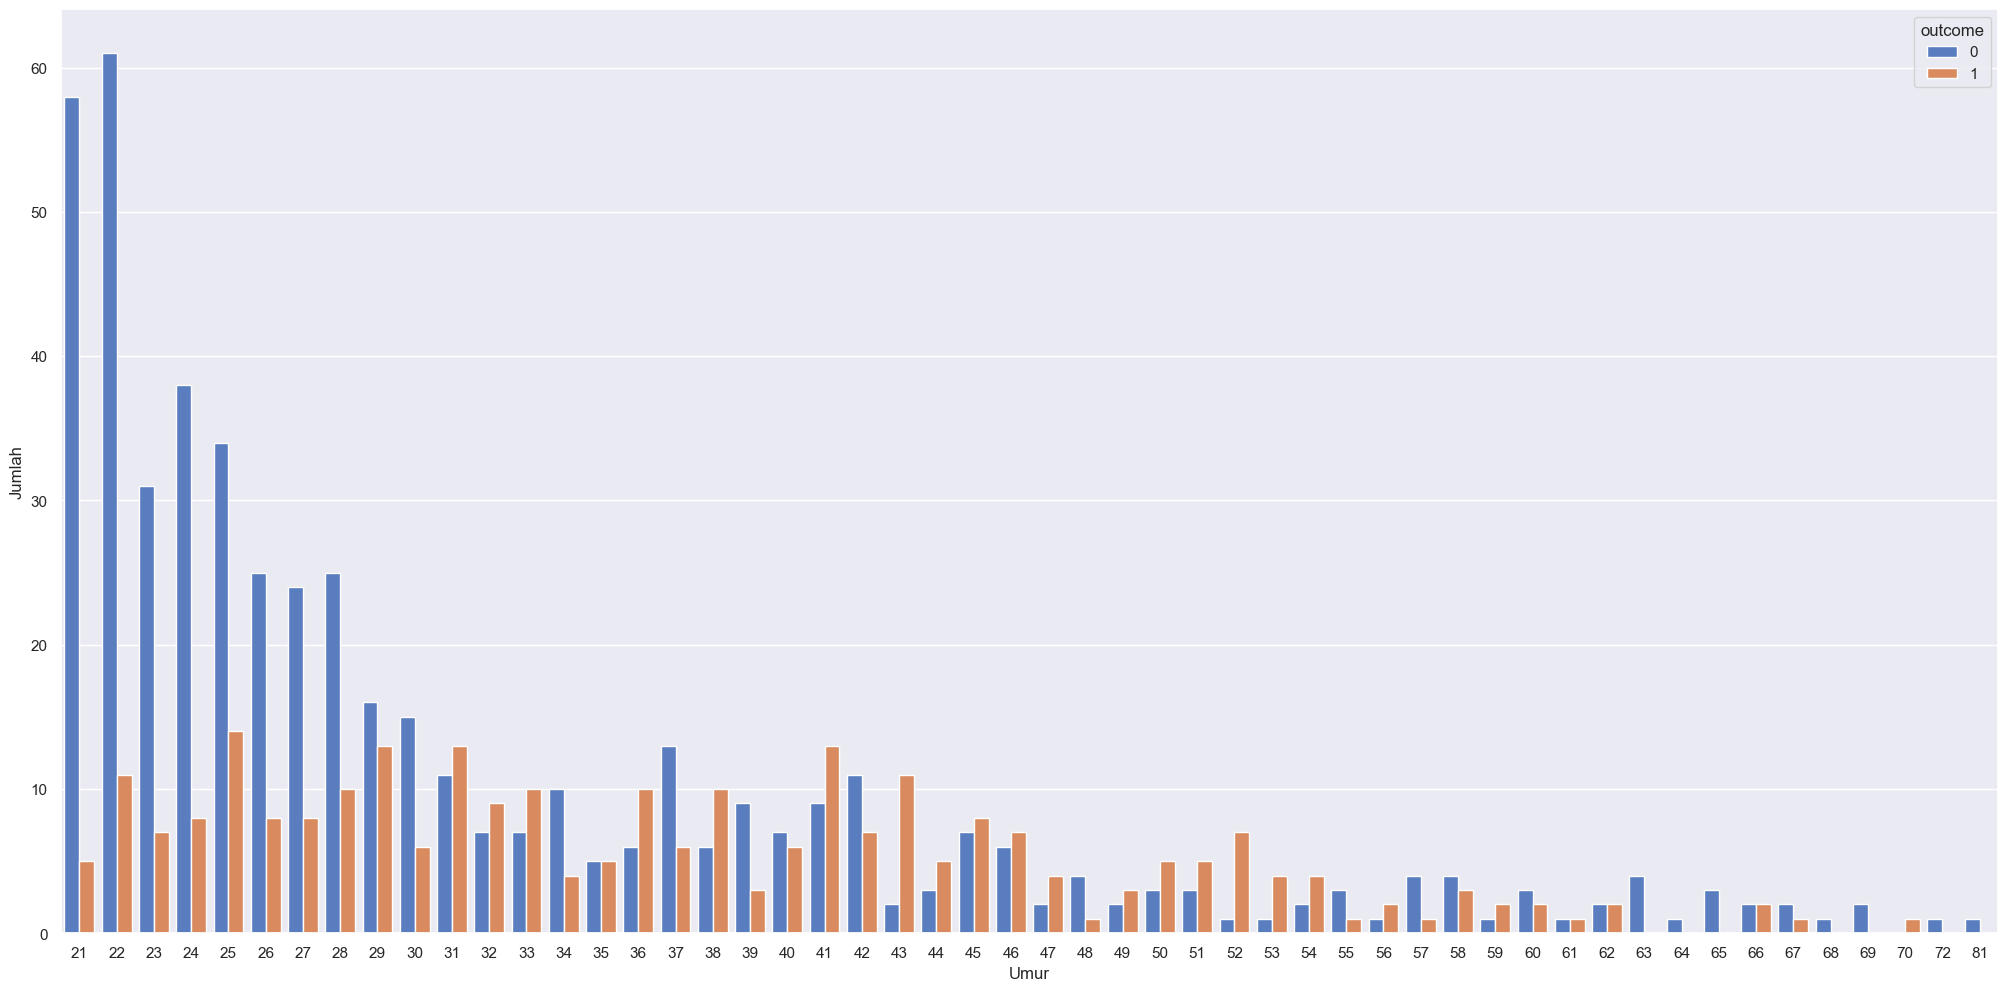

In [17]:
# Memvisualisasikan dataset age dengan outcome
sns.set(style="darkgrid")
plt.figure(figsize=(25,12))
sns.countplot(x='age', data=df, hue="outcome", palette="muted")

plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

- Visualisasi di atas menampilkan distribusi jumlah pasien diabetes berdasarkan umur, dengan membedakan pasien yang mengalami outcome positif (diabetes) dan negatif (tidak diabetes).
- Dalam visualisasi tersebut, sumbu x menunjukkan nilai umur, sedangkan sumbu y menunjukkan jumlah pasien diabetes. Bar dengan warna biru menunjukkan jumlah pasien yang tidak mengalami diabetes (outcome 0), sedangkan bar dengan warna oranye menunjukkan jumlah pasien yang mengalami diabetes (outcome 1).
- Dari visualisasi tersebut, kita dapat melihat bahwa jumlah pasien yang mengalami diabetes (outcome positif) cenderung lebih tinggi pada rentang usia 25-45 tahun, kemudian cenderung menurun pada rentang usia yang lebih tua. Sedangkan jumlah pasien yang tidak mengalami diabetes (outcome negatif) cenderung lebih tinggi pada rentang usia yang lebih tua, kemudian menurun pada rentang usia yang lebih muda.

In [18]:
# Melihat jumlah min dan max diabetespedigreefunction pada dataset
df['diabetespedigreefunction'].aggregate([max, min])

max    2.420
min    0.078
Name: diabetespedigreefunction, dtype: float64

- Menampilkan nilai diabetes pedigree function (DPF) yang dimiliki oleh pasien. 
- Berdasarkan hasil tersebut rentangan nilai diabetespedigreefunction pasien antara 0.078 paling rendah dan 2.420 paling tinggi
- Nilai diabetespedigreefunction merupakan nilai yang digunakan untuk mengukur risiko keturunan untuk mengembangkan diabetes. Nilai ini menggabungkan informasi tentang seberapa dekat hubungan seseorang dengan orang yang memiliki riwayat diabetes, serta seberapa banyak anggota keluarga yang memiliki riwayat diabetes. Oleh karena itu, semakin tinggi nilai diabetespedigreefunction, semakin besar kemungkinan seseorang memiliki risiko yang lebih tinggi untuk mengembangkan diabetes.

In [19]:
# Menampilkan jumlah outcome 0 dari dataset berdasarkan diabetespedigreefunction pasien
df.loc[df['outcome'] == 0, ['diabetespedigreefunction', 'outcome']].value_counts()

diabetespedigreefunction  outcome
0.207                     0          5
0.304                     0          4
0.299                     0          4
0.167                     0          4
0.284                     0          4
                                    ..
0.338                     0          1
0.337                     0          1
0.334                     0          1
0.332                     0          1
2.329                     0          1
Length: 372, dtype: int64

- Hasil tersebut menunjukkan jumlah pasien diabetes (outcome 0, yaitu tidak diabetes) berdasarkan nilai diabetes pedigree function (DPF) yang dimiliki oleh pasien. DPF adalah sebuah nilai numerik yang menunjukkan seberapa besar kemungkinan seseorang mengalami diabetes berdasarkan riwayat keluarga mereka.
- Dari hasil tersebut, kita dapat melihat beberapa nilai DPF yang paling sering ditemukan pada pasien dengan outcome 0, yaitu 0.207, 0.299, 0.167, 0.284, dan 0.190. Setiap nilai DPF tersebut muncul sebanyak 5, 4, 4, 4, dan 4 kali pada dataset.
- Nilai DPF mungkin dapat menjadi salah satu faktor yang mempengaruhi hasil diagnosis diabetes pada pasien.

In [20]:
# Menampilkan jumlah outcome 1 dari dataset berdasarkan diabetespedigreefunction pasien
df.loc[df['outcome'] == 1, ['diabetespedigreefunction', 'outcome']].value_counts()

diabetespedigreefunction  outcome
0.254                     1          4
0.258                     1          3
0.240                     1          2
0.238                     1          2
0.302                     1          2
                                    ..
0.422                     1          1
0.423                     1          1
0.431                     1          1
0.433                     1          1
2.420                     1          1
Length: 231, dtype: int64

- Hasil tersebut menunjukkan jumlah pasien diabetes (outcome 1, yaitu diabetes) berdasarkan nilai diabetes pedigree function (DPF) yang dimiliki oleh pasien. Dari hasil tersebut, kita dapat melihat beberapa nilai DPF yang paling sering ditemukan pada pasien dengan outcome 1, yaitu 0.254, 0.258, 0.240, 0.238, dan 0.302. Setiap nilai DPF tersebut muncul sebanyak 4, 3, 2, 2, dan 2 kali pada dataset.
- Tidak ada nilai DPF yang muncul lebih dari 4 kali pada pasien dengan outcome 1, sehingga kita dapat berasumsi bahwa nilai DPF tertentu mungkin tidak terlalu mempengaruhi risiko diabetes pada pasien.

In [21]:
# Melihat nilai max glucose pasien pada dataset
df['glucose'].aggregate([max])

max    199
Name: glucose, dtype: int64

In [22]:
# Menampilkan jumlah kadar gula pasien tertinggi dengan status positif diabetes
df.loc[df['glucose'] == 199, ['glucose', 'outcome']].value_counts()

glucose  outcome
199      1          1
dtype: int64

In [23]:
# Menampilkan jumlah outcome 0 5 teratas dari dataset berdasarkan glucose pasien
df.loc[df['outcome'] == 0, ['glucose', 'outcome']].value_counts().head()

glucose  outcome
99       0          17
100      0          13
106      0          13
111      0          11
105      0          10
dtype: int64

In [24]:
# Menampilkan jumlah outcome 1 5 teratas dari dataset berdasarkan glucose pasien
df.loc[df['outcome'] == 1, ['glucose', 'outcome']].value_counts().head()

glucose  outcome
125      1          7
158      1          6
128      1          6
129      1          6
115      1          6
dtype: int64

- Berdasarkan hasil diatas, terdapat perbedaan nilai rata-rata kadar glukosa darah antara pasien yang tidak mengalami diabetes (outcome = 0) dengan pasien yang mengalami diabetes (outcome = 1). Kadar glukosa darah pasien yang mengalami diabetes (outcome = 1) pada umumnya lebih tinggi daripada pasien yang tidak mengalami diabetes (outcome = 0).
- Nilai rata-rata kadar glukosa darah pada pasien yang tidak mengalami diabetes adalah kurang dari 125, yang merupakan nilai ambang batas untuk diagnosis diabetes. Sementara pada pasien yang mengalami diabetes, nilai rata-rata kadar glukosa darah lebih tinggi dari 125. Kadar glukosa darah tertinggi pada pasien yang mengalami diabetes adalah 199, yang merupakan nilai tertinggi pada keseluruhan data pasien. Semakin tinggi nilai Glucose, semakin tinggi kadar glukosa dalam darah individu
- Dari sini dapat disimpulkan bahwa kadar glukosa darah tinggi dapat menjadi faktor risiko dalam mengembangkan diabetes. Oleh karena itu, pemantauan kadar glukosa darah secara teratur dan pengaturan pola makan dan aktivitas fisik yang sehat dapat membantu mengurangi risiko terkena diabetes.

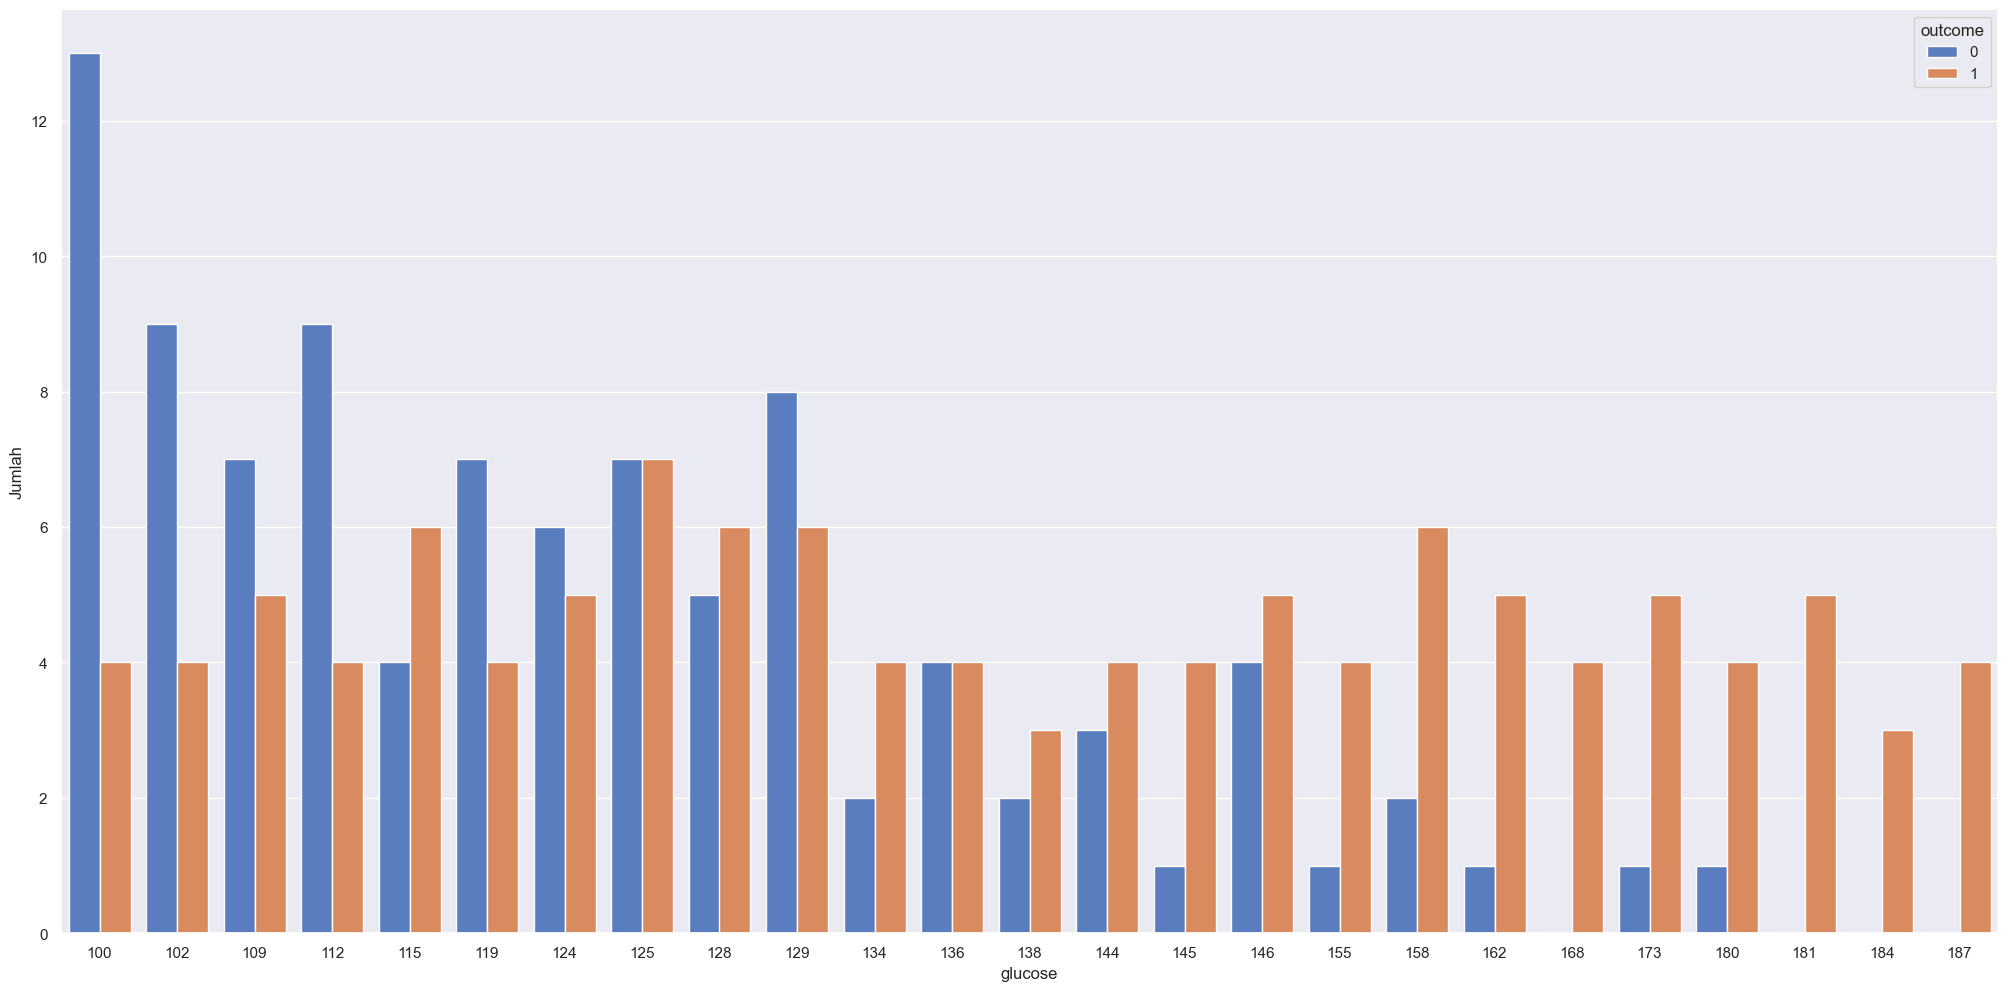

In [25]:
# Memvisualisasikan dataset age dengan outcome
sns.set(style="darkgrid")
plt.figure(figsize=(25,12))
top_glucose = df[df['outcome'] == 1]['glucose'].value_counts().nlargest(25).index
sns.countplot(x='glucose', data=df[df['glucose'].isin(top_glucose)], hue="outcome", palette="muted")
plt.xlabel("glucose")
plt.ylabel("Jumlah")
plt.show()

- Visualisasi tersebut menunjukkan distribusi jumlah pasien berdasarkan nilai glukosa pada pasien yang memiliki diabetes. Pada sumbu X terdapat nilai-nilai glukosa yang dikelompokkan berdasarkan rentang nilai tertentu, sedangkan pada sumbu Y terdapat jumlah pasien yang memiliki nilai glukosa dalam rentang tersebut. Selain itu, visualisasi tersebut juga membagi jumlah pasien menjadi dua kelompok yaitu pasien yang memiliki diabetes (ditunjukkan dengan warna biru) dan pasien yang tidak memiliki diabetes (ditunjukkan dengan warna oranye). Dengan visualisasi tersebut, kita dapat melihat sebaran nilai glukosa pada pasien dengan diabetes dan tanpa diabetes serta membandingkan jumlah pasien pada masing-masing kelompok berdasarkan rentang nilai tertentu.

In [26]:
# Melihat jumlah max bloodpressure pada dataset
df['bloodpressure'].aggregate([max])

max    122
Name: bloodpressure, dtype: int64

- Berdasarkan hasil dapat dilihat bahwa tekanan darah pasien tertinggi yaitu 122

In [27]:
# Menampilkan pasien dengan tekanan darah tertinggi yang berstatus tidak memiliki penyakit diabetes
df.loc[df['bloodpressure'] == 122, ['bloodpressure', 'outcome']].value_counts()

bloodpressure  outcome
122            0          1
dtype: int64

- Jika dilihat dari tabel diatas pasien dengan tekanan darah tinggi (122) tidak terkena penyakit diabetes berdasarkan hasil dari pasien yang diuji yang mana hanya terdapat 1 pasien 

In [28]:
# Menampilkan jumlah outcome 1 5 teratas dari dataset berdasarkan bloodpressure pasien
df.loc[df['outcome'] == 1, ['bloodpressure', 'outcome']].value_counts().head()

bloodpressure  outcome
70             1          23
76             1          18
78             1          17
74             1          17
72             1          16
dtype: int64

- Bersarkan hasil diatas dapat dilihat bahwa tekanan darah pasien yang diuji pada dataset ini lebih banyak dengan nilai tekanan darahnya 70 yang memiliki penyakit diabetes
- Tekanan darah yang tinggi (hipertensi) dan diabetes mellitus adalah dua kondisi kesehatan yang berbeda dan dapat terjadi secara independen. Meskipun kedua kondisi ini dapat terjadi bersama-sama, tekanan darah tinggi tidak langsung menyebabkan diabetes mellitus. Namun, tekanan darah tinggi dapat meningkatkan risiko seseorang terkena diabetes jika tidak diatasi dengan pengobatan atau perubahan gaya hidup. Oleh karena itu, penting untuk menjaga tekanan darah pada level yang sehat dan melakukan pemeriksaan gula darah secara teratur untuk mengidentifikasi risiko diabetes mellitus.

In [29]:
# Melihat nilai max bmi pada dataset
df['bmi'].aggregate([max])

max    67.1
Name: bmi, dtype: float64

- Berdasarkan data di atas nilai bmi pada pasien yang diuji dalam dataset memiliki bmi tertinggi yaitu 67,1
- Berdasarkan standar yang dikeluarkan oleh Organisasi Kesehatan Dunia (WHO), seseorang dengan nilai BMI kurang dari 18,5 dianggap kurus, antara 18,5 hingga 24,9 dianggap normal, antara 25 hingga 29,9 dianggap overweight atau kelebihan berat badan, dan 30 atau lebih dianggap obesitas. Obesitas merupakan faktor risiko penting untuk terkena diabetes, sehingga nilai BMI yang tinggi dapat menunjukkan risiko yang lebih tinggi untuk terkena diabetes.

In [30]:
# Menampilkan pasien dengan nilai indek massa tubuh yang berstatus memiliki penyakit diabetes
df.loc[df['outcome'] == 1, ['bmi', 'outcome']].value_counts()

bmi   outcome
32.9  1          8
31.6  1          7
33.3  1          6
32.0  1          5
31.2  1          5
                ..
34.1  1          1
33.9  1          1
31.1  1          1
31.0  1          1
67.1  1          1
Length: 148, dtype: int64

- Berdasarkan data di atas dapat dilihat bahwa pasien dengan rentang nilai bmi 31-33 memiliki penyakit diabetes
- Nilai bmi tertinggi pada pasien yang diuji dalam dataset ini juga memiliki penyakit diabetes

## -Korelasi-

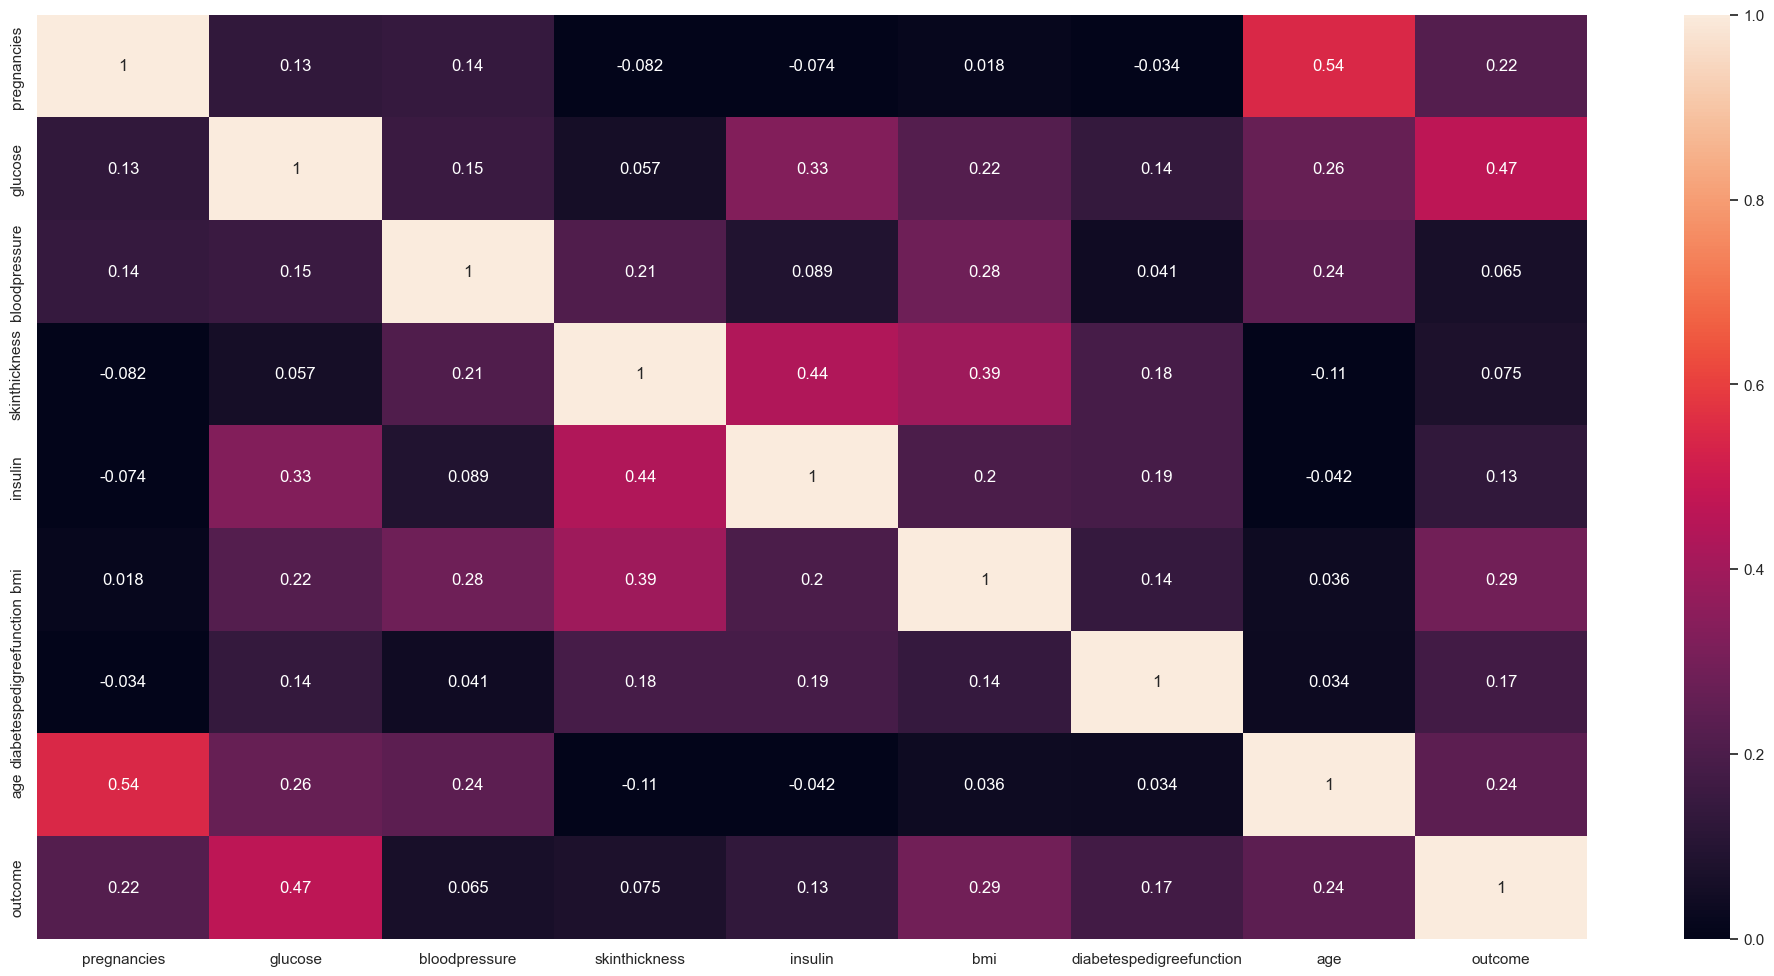

In [31]:
# Heatmap korelasi antara target dengan fitur 
corr = df.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [32]:
df.corr(numeric_only = True).nlargest(9, 'outcome')['outcome']

outcome                     1.000000
glucose                     0.466581
bmi                         0.292695
age                         0.238356
pregnancies                 0.221898
diabetespedigreefunction    0.173844
insulin                     0.130548
skinthickness               0.074752
bloodpressure               0.065068
Name: outcome, dtype: float64

- Berdasarkan heatmap korelasi diatas nilai korelasi antara variabel target (memiliki penyakit diabetes) denganvariabel fitur yang memiliki nilai korelasi tertinggi dengan target yaitu kadar glukosa dalam darah, indeks massa tubuh, usia, pregnancies, riwayat berdasarkan keluarga, dan insulin.

In [33]:
# Melihat korelasi antara target dengan fitur menggunakan function phik matrix
df.phik_matrix().nlargest(9, 'outcome')['outcome']

interval columns not set, guessing: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome']


outcome                     1.000000
glucose                     0.488153
age                         0.407535
bmi                         0.318172
pregnancies                 0.307429
skinthickness               0.278824
diabetespedigreefunction    0.227172
insulin                     0.208625
bloodpressure               0.199601
Name: outcome, dtype: float64

- Tidak jauh berbeda dari hasil korelasi diatas, akan tetapi semua variabel fitur memiliki korelasi dengan target

<AxesSubplot: title={'center': 'Korelasi target dengan fitur'}>

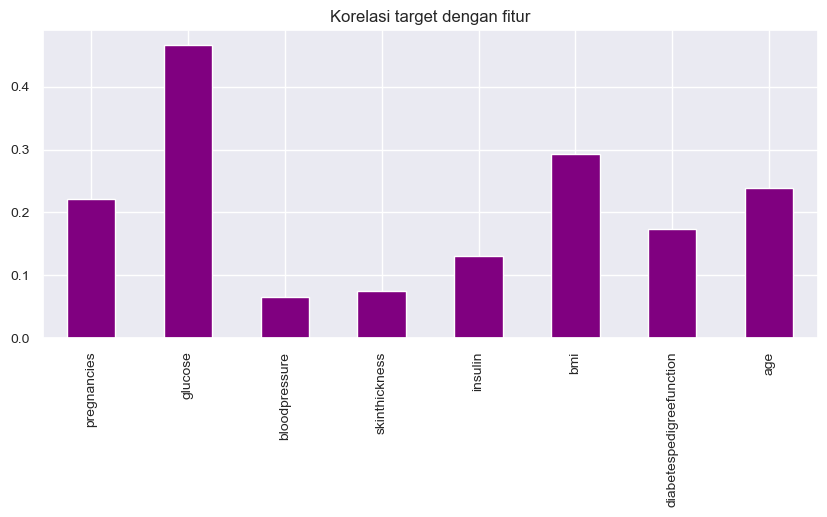

In [34]:
# Korelasi antara setiap fitur (feature) pada dataset dengan variabel target 'outcome'
X = df.drop(['outcome'],axis=1)
X.corrwith(df['outcome']).plot.bar(figsize = (10, 4), title = "Korelasi target dengan fitur", 
                                        fontsize = 10,rot = 90, grid = True, color= 'purple')

- Berdasarkan heatmap diatas semua kolom fitur memiliki korelasi dengan target
- Setiap batang pada diagram menunjukkan koefisien korelasi antara setiap fitur dengan variabel target. Jika batang memiliki nilai positif, maka fitur tersebut memiliki korelasi positif dengan variabel target, sedangkan jika batang memiliki nilai negatif, maka fitur tersebut memiliki korelasi negatif dengan variabel target namun dapat dilihat pada gambar diatas semua fitur memiliki korelasi yang positif dengan target. Nilai korelasi berkisar antara 0.1 hingga 0.48, dimana 0 menunjukkan bahwa korelasi tersebut tidak signifikan atau tidak kuat, dan 1 menunjukkan korelasi positif sempurna. Diagram ini membantu untuk memvisualisasikan fitur-fitur mana yang paling kuat terkait dengan variabel target pada dataset.

# V. Feature Engineering / Preprocessing

In [35]:
# Menyalin dataframe dengan variabel baru
nba = df.copy()

In [36]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [37]:
jk = nba.iloc[:,[0,1,2,3,4,5,6,7]]
calc_vif(jk)

,variables,VIF
5,bmi,18.408884
1,glucose,16.725078
2,bloodpressure,14.619512
7,age,13.492985
3,skinthickness,4.008696
0,pregnancies,3.275748
6,diabetespedigreefunction,3.195626
4,insulin,2.063689


- VIF > 10, VIF yang melebihi 5 atau 10 menunjukkan multikolinearitas yang tinggi antara variabel independen ini dengan variabel lainnya
- Nilai VIF akan semakin besar jika terdapat korelasi yang semakin besar diantara variabel bebas (sumber :http://eprints.uny.ac.id/2368/1/SKRIPSI_Agriska.pdf)
- Tetapi menurut asumsi saya informasi yang ada pada kolom age tidak ada hubungannya dengan variabel lainnya sehingga akan tetap saya gunakan sebagai fitur, karena semua menurut saya penting untuk target

## -Data Splitting-

In [38]:
# Split Fitur dan Target
X = nba.drop('outcome', axis=1)
y = nba['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(614, 8)
(154, 8)
(614,)
(154,)


- Memisahkan antara fitur dengan target

In [39]:
# Menggabungkan baris X train dan y train ke dalam variabel baru
nba_ct = pd.concat([X_train, y_train], axis=1)
nba_ct.shape

(614, 9)

In [40]:
# Membuat variabel baru dari X train
X_train_eda = X_train.copy()

In [41]:
col = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age','outcome']
num = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']

In [42]:
# Membuat variabel baru dari X_train berdasarkan data numerikal
num_col = X_train_eda.iloc[:,[0,1,2,3,4,5,6,7]].copy()

## -Handling Outliers-

In [43]:
# Membuat function untuk handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

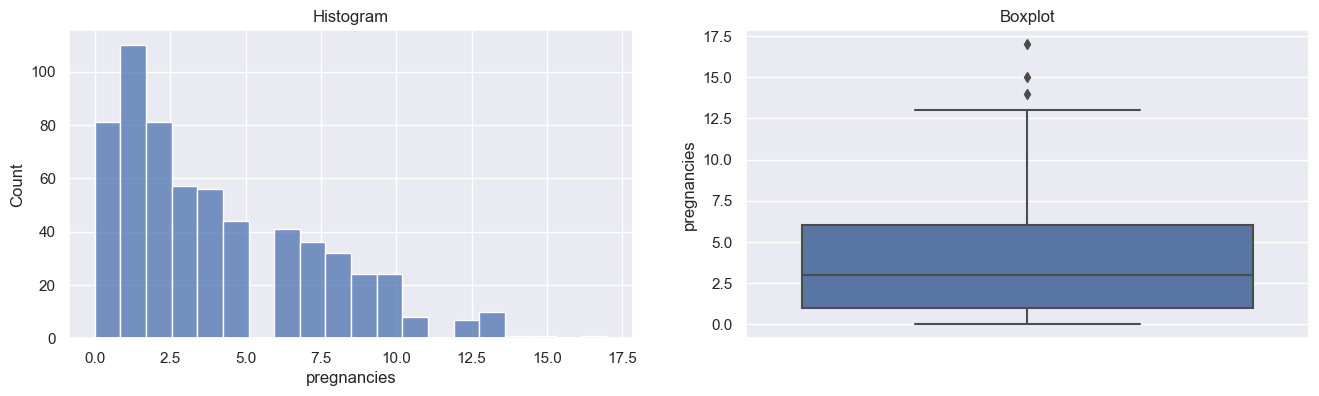


Skewness Value pregnancies :  0.8613608799013929


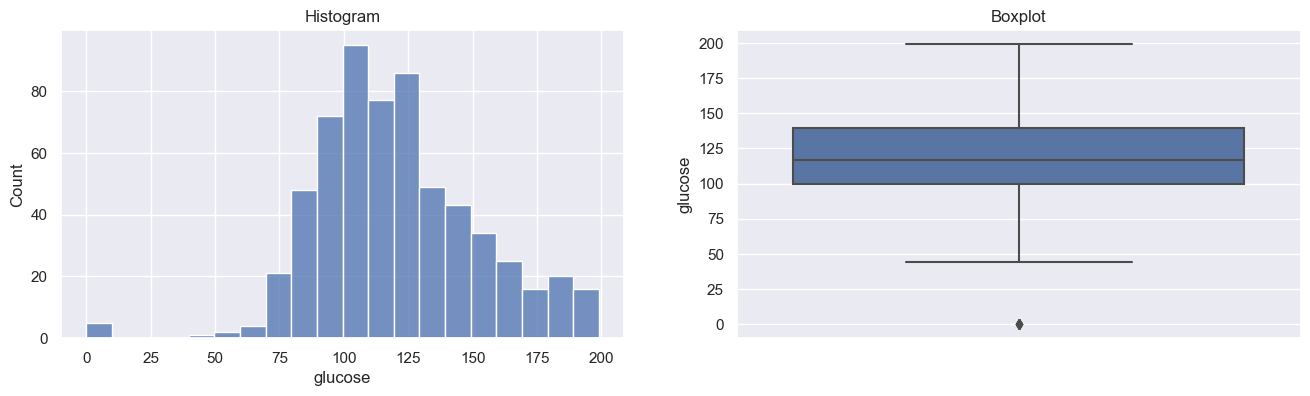


Skewness Value glucose :  0.09217820499299252


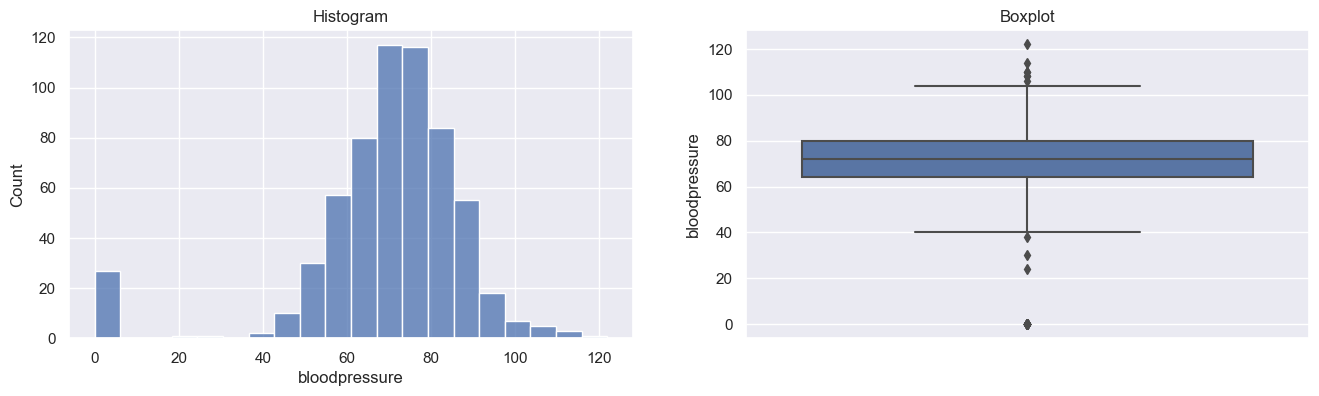


Skewness Value bloodpressure :  -1.8265415247389016


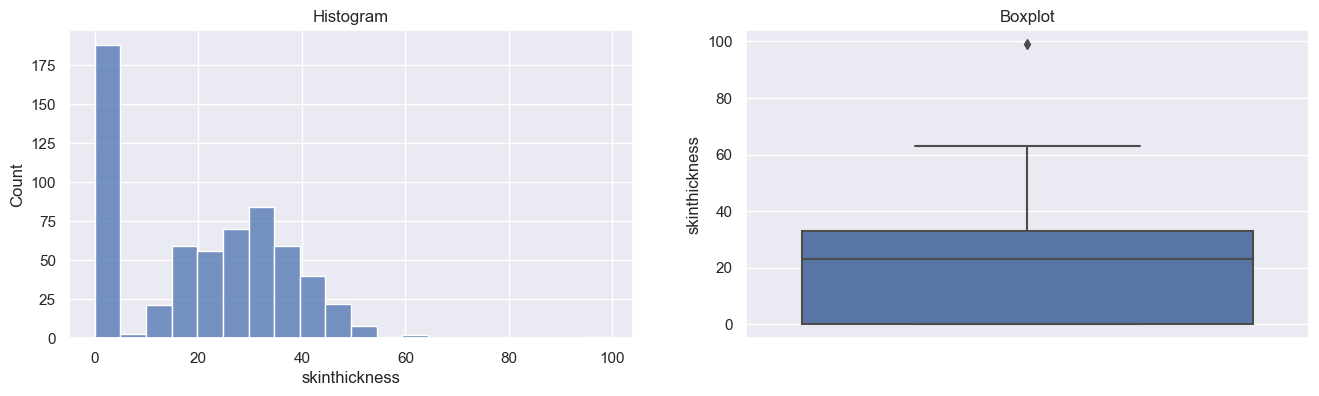


Skewness Value skinthickness :  0.15369794522454835


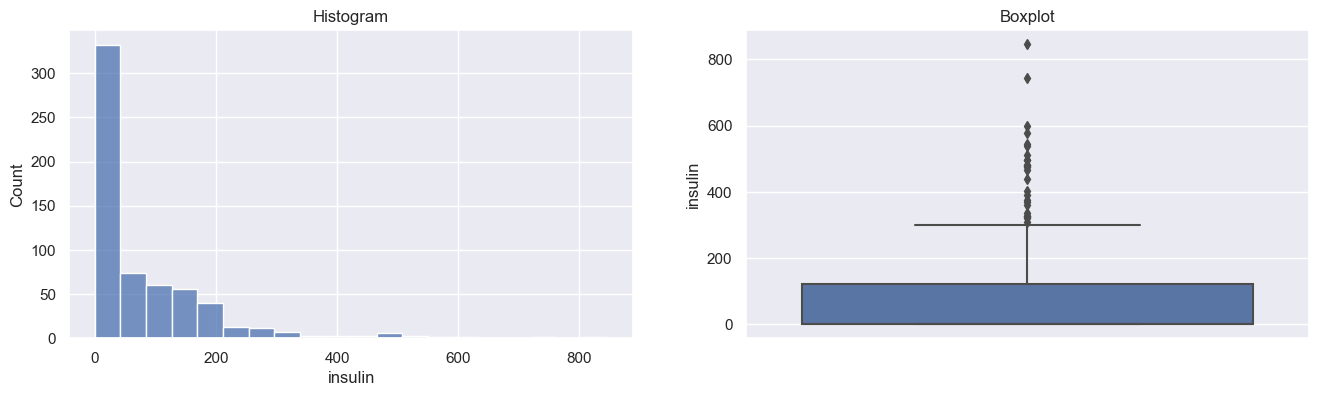


Skewness Value insulin :  2.445770289570739


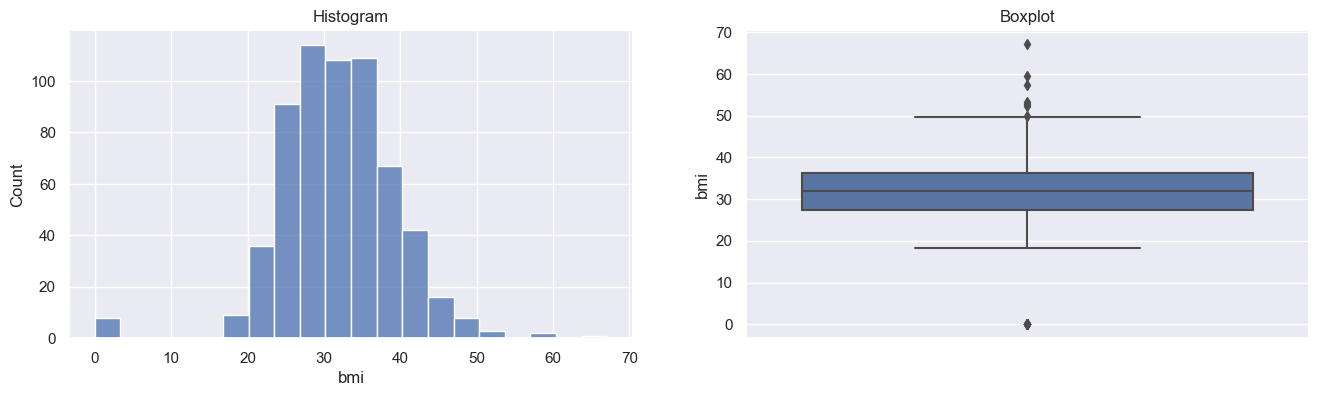


Skewness Value bmi :  -0.3172495103437271


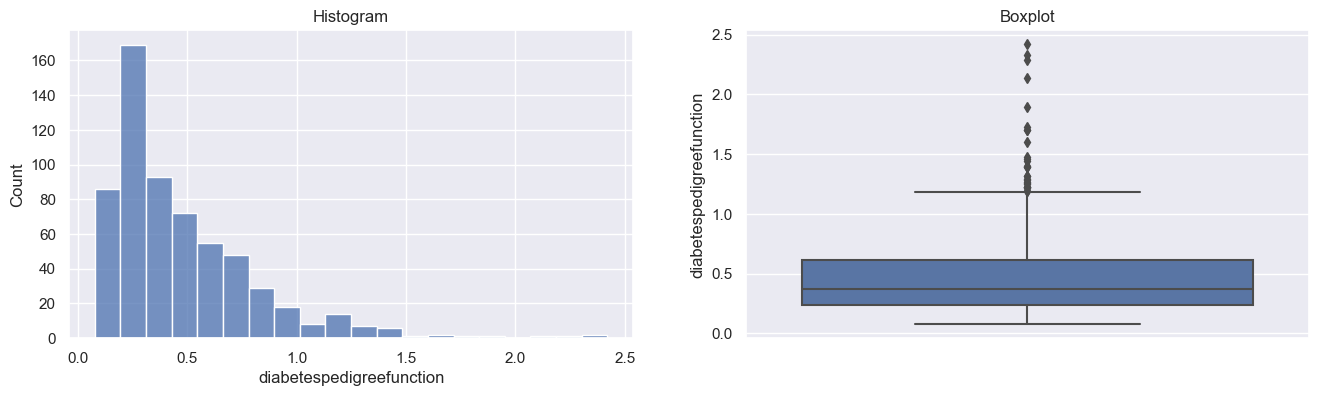


Skewness Value diabetespedigreefunction :  1.967902329906881


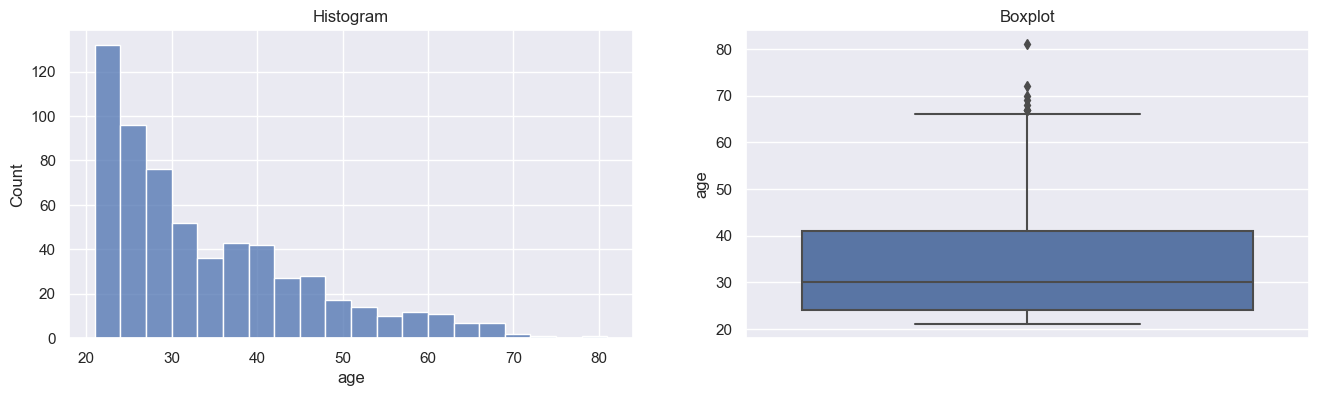


Skewness Value age :  1.1201070804017137


In [44]:
# Cek skew dan outlier pada dataset yang menjadi fitur dengan boxplot dan histogram

diagnostic_plots(nba_ct, 'pregnancies')
print('\nSkewness Value pregnancies : ', nba_ct['pregnancies'].skew())

diagnostic_plots(nba_ct, 'glucose')
print('\nSkewness Value glucose : ', nba_ct['glucose'].skew())

diagnostic_plots(nba_ct, 'bloodpressure')
print('\nSkewness Value bloodpressure : ', nba_ct['bloodpressure'].skew())

diagnostic_plots(nba_ct, 'skinthickness')
print('\nSkewness Value skinthickness : ', nba_ct['skinthickness'].skew())

diagnostic_plots(nba_ct, 'insulin')
print('\nSkewness Value insulin : ', nba_ct['insulin'].skew())

diagnostic_plots(nba_ct, 'bmi')
print('\nSkewness Value bmi : ', nba_ct['bmi'].skew())

diagnostic_plots(nba_ct, 'diabetespedigreefunction')
print('\nSkewness Value diabetespedigreefunction : ', nba_ct['diabetespedigreefunction'].skew())

diagnostic_plots(nba_ct, 'age')
print('\nSkewness Value age : ', nba_ct['age'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi data pada variabel pregnancies, bloodpressure, insulin, diabetespedigreefunction dan age terdistribusi tidak normal dimana terdapat skewness 0.8613608799013929, -1.8265415247389016, 2.445770289570739, 1.967902329906881, 1.1201070804017137 secara berurutan yang terlihat adanya right-end outliers pada boxplot. Sedangkan untuk kolom glucose nilai skew = 0.09217820499299252, nilai skewness pada skinthickness = 0.15369794522454835 dan kolom bmi memiliki nilai skew = -0.3172495103437271 yang terlihat tidak adanya right-end atau left-end outliers pada boxplot
- Handling outliers dengan Tukey's Rule (IQR) pada variabel pregnancies, bloodpressure, insulin, diabetespedigreefunction dan age karena data terdistribusi tidak normal. Oleh karena itu, akan dicari nilai IQR terlebih dahulu untuk menyamakan rentang nilai yang akan masuk ke dalam boxplot. Dan membuat data menjadi terdistribusi secara normal. Sedangkan untuk variabel glucose, skinthickness dan bmi akan dihandling dengan Z-Score karena data terdistribusi normal.

In [45]:
# Outlier detection in glucose (Gaussian)
upper = nba_ct['glucose'].mean() + (3*df['glucose'].std())
lower = nba_ct['glucose'].mean() - (3*df['glucose'].std())

outlier = nba_ct[(nba_ct['glucose'] <= lower) | (nba_ct['glucose'] >= upper)]

print('Percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Percentage:  0.6510416666666667 %
Upper boundary:  216.59700767987118
Lower boundary:  24.761298509053873


- Persentase outliers = 0,6 %, sehingga akan dihandling dengan metode gaussian menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [46]:
# Outlier detection in skinthickness (Gaussian)
upper = nba_ct['skinthickness'].mean() + (3*df['skinthickness'].std())
lower = nba_ct['skinthickness'].mean() - (3*df['skinthickness'].std())

outlier = nba_ct[(nba_ct['skinthickness'] <= lower) | (nba_ct['skinthickness'] >= upper)]

print('Percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Percentage:  0.13020833333333331 %
Upper boundary:  68.43971459243384
Lower boundary:  -27.273590813932216


- Persentase outliers = 0,1 %, sehingga akan dihandling dengan metode gaussian menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [47]:
# Outlier detection in bmi (Gaussian)
upper = nba_ct['bmi'].mean() + (3*df['bmi'].std())
lower = nba_ct['bmi'].mean() - (3*df['bmi'].std())

outlier = nba_ct[(nba_ct['bmi'] <= lower) | (nba_ct['bmi'] >= upper)]

print('Percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Percentage:  1.4322916666666665 %
Upper boundary:  55.60231809467681
Lower boundary:  8.297356172424166


- Persentase outliers = 1,4 %, sehingga akan dihandling dengan metode gaussian menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [48]:
# Menghitung outliers pada kolom pregnancies dengan IQR
Q1 = nba_ct['pregnancies'].quantile(.25)
Q3 = nba_ct['pregnancies'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['pregnancies'] <= lower) | (nba_ct['pregnancies'] >= upper)]

print('Persentase outliers pada kolom pregnancies: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom pregnancies:  0.0 %
Upper boundary:  21.0
Lower boundary:  -14.0


In [49]:
# Menghitung outliers pada kolom bloodpressure dengan IQR
Q1 = nba_ct['bloodpressure'].quantile(.25)
Q3 = nba_ct['bloodpressure'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['bloodpressure'] <= lower) | (nba_ct['bloodpressure'] >= upper)]

print('Persentase outliers pada kolom bloodpressure: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom bloodpressure:  3.515625 %
Upper boundary:  128.0
Lower boundary:  16.0


- Outlier pada kolom  di kolom bloodpressure akan dihandling dengan iqr menggunakan fold 3 IQR. Dan akan ditangani menggunakan transformer winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [50]:
# Menghitung outliers pada kolom insulin dengan IQR
Q1 = nba_ct['insulin'].quantile(.25)
Q3 = nba_ct['insulin'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['insulin'] <= lower) | (nba_ct['insulin'] >= upper)]

print('Persentase outliers pada kolom insulin: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom insulin:  1.171875 %
Upper boundary:  488.0
Lower boundary:  -366.0


- Outlier pada kolom  di kolom insulin akan dihandling dengan iqr menggunakan fold 3 IQR. Dan akan ditangani menggunakan transformer winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [51]:
# Menghitung outliers pada kolom diabetespedigreefunction dengan IQR
Q1 = nba_ct['diabetespedigreefunction'].quantile(.25)
Q3 = nba_ct['diabetespedigreefunction'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['diabetespedigreefunction'] <= lower) | (nba_ct['diabetespedigreefunction'] >= upper)]

print('Persentase outliers pada kolom diabetespedigreefunction: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom diabetespedigreefunction:  0.6510416666666667 %
Upper boundary:  1.7475
Lower boundary:  -0.8879999999999999


- Outlier pada kolom  di kolom diabetespedigreefunction akan dihandling dengan iqr menggunakan fold 3 IQR. Dan akan ditangani menggunakan transformer winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [52]:
# Menghitung outliers pada kolom age dengan IQR
Q1 = nba_ct['age'].quantile(.25)
Q3 = nba_ct['age'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['age'] <= lower) | (nba_ct['age'] >= upper)]

print('Persentase outliers pada kolom age: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom age:  0.0 %
Upper boundary:  92.0
Lower boundary:  -27.0


## -Handling Missing Values-

In [53]:
# Melihat deskripsi pada keseluruhan dataset
nba.describe().T[1:].T.style.background_gradient(cmap='PuBu')

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Pada konteks data kesehatan, nilai 0 pada kolom Glucose, Blood Pressure, Skin Thickness, Insulin, dan BMI bisa dianggap sebagai missing value.
- Nilai 0 pada kolom Glucose, Blood Pressure, Skin Thickness, Insulin, dan BMI mungkin merupakan nilai yang tidak mungkin atau tidak masuk akal dalam konteks kesehatan manusia. Misalnya, sangat tidak mungkin bahwa seseorang memiliki kadar glukosa darah atau tekanan darah 0.
- Nilai 0 pada kolom Glucose, Blood Pressure, Skin Thickness, Insulin, dan BMI mungkin merupakan nilai yang hilang atau tidak terukur pada saat pengambilan data. Misalnya, mungkin terjadi kesalahan pengukuran atau kegagalan teknis dalam memperoleh nilai yang benar.
- Oleh karena itu, nilai 0 pada kolom Glucose, Blood Pressure, Skin Thickness, Insulin, dan BMI  dianggap sebagai missing values, penting untuk mempertimbangkan konteks spesifik dataset dan melakukan pemeriksaan yang cermat pada data tersebut. Dalam beberapa kasus, penggunaan nilai 0 sebagai pengganti untuk nilai yang hilang atau tidak terukur mungkin dapat menimbulkan bias atau kesalahan dalam analisis dan pemodelan yang akan dilakukan.

In [54]:
# Mencari missing value pada masing-masing kolom
nba[['glucose','bloodpressure','skinthickness','insulin','bmi']] = nba[['glucose','bloodpressure','skinthickness','insulin','bmi']].replace(0,np.NaN)

# Menampilkan jumlah mising values yang ada pada dataset
print(nba.isnull().sum())

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64


- Terdapat missing values atau nilai yang hilang pada dataset Pima Indian Diabetes yang terdapat pada kolom glucose (5), blood pressure (35), skin thickness (227), insulin (374), dan bmi (11)
- Missing values merupakan karakteristik dari Missing Not At Random (MNAR) dikarenakan ada mekanisme atau alasan mengapa nilai yang hilang muncul dalam kumpulan data, kehilangan nilai tersebut tergantung pada informasi yang tidak dicatat dalam kumpulan data. Sebagai contoh, pada dataset ini sebuah penelitian medis mengumpulkan data tentang kesehatan pasien dan satu variabel dalam dataset adalah diabetes. Jika pasien yang diabetes cenderung enggan memberikan informasi tentang kadar glukosa darah atau tekanan darah mereka, maka nilai yang hilang dalam variabel diabetes akan tergantung pada nilai variabel yang tidak tercatat yaitu kadar glukosa darah atau tekanan darah pasien, dalam situasi ini, lebih baik untuk menandai nilai-nilai yang hilang untuk memprediksi target.

In [55]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (nba.isna().sum() / len(nba)) * 100
print(missing_percentage)

total_missing = nba.isna().sum().sum()
percentage_missing = (total_missing / (nba.shape[0] * nba.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

pregnancies                  0.000000
glucose                      0.651042
bloodpressure                4.557292
skinthickness               29.557292
insulin                     48.697917
bmi                          1.432292
diabetespedigreefunction     0.000000
age                          0.000000
outcome                      0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 9.43%


- Dapat dilihat bahwa missing values/nilai yang kosong pada dataset memiliki persentase untuk keseluruhan nilai missing values adalah 9.43%, maka akan dihandling dengan cara di capping atau diganti nilainya dengan nilai median karena distribusi data pada masing-masing kolom tidak terdistribusi normal/skew. Jika menggunakan Mean Imputasi (variabel numerik dengan distribusi Gaussian/Normal), dan jika menggunakan Median Imputasi (variabel numerik dengan distribusi tidak normal/skew)

## -Pipeline- ##

In [56]:
# Melakukan smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

- Metode Synthetic Minority Over-sampling Technique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas. (sumber: https://mti.binus.ac.id/2018/06/08/synthetic-minority-over-sampling-technique-smote-algorithm-for-handling-imbalanced-data/)

In [57]:
# Pepiline untuk handling outliers pada dataset
num_pipeline1 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr1 = num_pipeline1.fit_transform(X_resampled[['glucose', 'skinthickness', 'bmi']])

In [58]:
# Pipeline untuk handling outliers pada dataset
num_pipeline2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr2 = num_pipeline2.fit_transform(X_resampled[['pregnancies','bloodpressure', 'insulin', 'diabetespedigreefunction', 'age']])

In [59]:
# Pipline untuk handling missing values
num_pipeline3 = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])

num_tr3 = num_pipeline3.fit_transform(X_resampled[['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']])
num_tr3

array([[196.        ,  90.        ,   0.        ,   0.        ,
         39.8       ],
       [ 81.        ,  72.        ,  15.        ,  76.        ,
         30.1       ],
       [127.        ,  58.        ,  24.        , 275.        ,
         27.7       ],
       ...,
       [140.        ,   0.        ,   0.        ,   0.        ,
         32.00954647],
       [132.        , 100.        ,  31.        , 142.        ,
         33.35844888],
       [109.        ,  75.        ,  38.        , 114.        ,
         27.97447019]])

In [60]:
# Melakukan transformasi data pada dataset 
full_pipeline = ColumnTransformer([
        ("num1", num_pipeline1, ['glucose', 'skinthickness', 'bmi']),
        ("num2", num_pipeline2, ['pregnancies','bloodpressure', 'insulin', 'diabetespedigreefunction', 'age']),
        ("num3", num_pipeline3, ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi'])
    ])
train_tr = full_pipeline.fit_transform(X_resampled)

In [61]:
test_tr = full_pipeline.transform(X_test)

# VI. Model Definition 

#### -Penjelasan algoritma-algoritma model yang digunakan - ####
1. LogisticRegression
- Deskripsi: Model linear untuk klasifikasi dengan menggunakan fungsi logistik
- Kelebihan: Cepat, mudah digunakan, memungkinkan interpretasi koefisien, dan bisa digunakan pada data dengan fitur yang banyak.
- Kelemahan: Tidak cocok untuk data yang kompleks, sensitif terhadap overfitting, tidak bisa menangani fitur yang tidak relevan, dan tidak bisa menangani kelas yang tidak seimbang.
2. SVC (Support Vector Machine Classifier)
- Deskripsi: Model yang digunakan untuk klasifikasi dengan mencari hyperplane yang terbaik memisahkan antara kelas.
- Kelebihan: Cocok untuk data dengan dimensi yang tinggi, bisa menangani kasus kelas yang tidak seimbang, dan memungkinkan penggunaan kernel function untuk menangani data yang tidak linier.
- Kelemahan: Cenderung memakan waktu yang lama untuk training pada data yang besar, sensitif terhadap pilihan parameter seperti kernel function dan C (penalty parameter).
3. DecisionTreeClassifier
- Deskripsi: Model klasifikasi yang membangun struktur pohon untuk mengklasifikasikan data berdasarkan serangkaian pertanyaan yang diajukan pada fitur.
- Kelebihan: Mudah diinterpretasikan, bisa menangani fitur yang tidak relevan, dan bisa menangani kelas yang tidak seimbang.
- Kelemahan: Cenderung menghasilkan overfitting pada data yang kompleks, sensitif terhadap noise dan variasi data, dan tidak efektif pada data dengan dimensi yang tinggi.
4. RandomForestClassifier
- Deskripsi: Model klasifikasi ensemble yang membangun beberapa pohon keputusan pada subset data dan menggabungkan hasilnya.
- Kelebihan: Mampu menangani kasus kelas yang tidak seimbang, stabil terhadap variasi data dan noise, dan bisa menangani fitur yang tidak relevan.
- Kelemahan: Cenderung memakan waktu yang lama untuk training pada data yang besar, dan kurang mudah diinterpretasikan dibandingkan dengan Decision Tree.
5. KNeighborsClassifier
- Deskripsi: Model klasifikasi yang mengklasifikasikan data berdasarkan kelas tetangga terdekat dalam jarak yang ditentukan.
- Kelebihan: Mudah digunakan, efektif pada data dengan jumlah dimensi yang rendah, dan mampu menangani kasus kelas yang tidak seimbang.
- Kelemahan: Cenderung memakan waktu yang lama pada data dengan dimensi yang tinggi dan jumlah data yang besar, sensitif terhadap skalabilitas data, dan sensitif terhadap nilai K.

(sumber : https://learn.nural.id/course/machine-learning/klasifikasi-machine-learning-di-python/algoritma-dan-model)

# VII.  Model Training

In [62]:
# Defining Logistic Regression Model
log_model = LogisticRegression(max_iter = 100000, random_state = 42)

# Defining SVM Classifier Model
svm_model = SVC(random_state = 42)

# Defining Decision Tree Classifier Model
dtc_model = DecisionTreeClassifier(random_state = 42)

# Defining Random Forest Classifier Model
rfc_model = RandomForestClassifier(random_state = 42)

# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()

# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(random_state=42)

skfold = StratifiedKFold(n_splits=5)

### -Cross Validation- ###

In [63]:
# Checking cross validation score
cv_log_model = cross_val_score(log_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_dtc_model = cross_val_score(dtc_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_rfc_model = cross_val_score(rfc_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, train_tr, y_resampled, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dtc_model,cv_rfc_model,cv_knn_model,cv_ada_model],['log_model', 'svm_model','dtc_model','rfc_model','knn_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.7375 0.6375 0.725  0.725  0.725 ]
recall - Mean - Cross Validation :  0.7100000000000001
recall - Std - Cross Validation  :  0.0365718470958195
recall - Range of Test-Set       :  0.6734281529041806 - 0.7465718470958196
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.65   0.6625 0.6375 0.65   0.7375]
recall - Mean - Cross Validation :  0.6675000000000001
recall - Std - Cross Validation  :  0.035881750236018334
recall - Range of Test-Set       :  0.6316182497639817 - 0.7033817502360185
--------------------------------------------------
dtc_model
recall - All - Cross Validation  :  [0.7    0.6875 0.8375 0.7875 0.9   ]
recall - Mean - Cross Validation :  0.7825
recall - Std - Cross Validation  :  0.08085480814398117
recall - Range of Test-Set       :  0.7016451918560188 - 0.8633548081439811
--------------------------------------------------
rfc_model
recall - All - Cross Validation  :  [0.

- Berdasarkan hasil di atas, dapat disimpulkan bahwa dari semua model yang diuji, RandomForestClassifier (rfc_model) adalah model terbaik dengan nilai recall rata-rata cross-validation sebesar 0.8575. Hal ini menunjukkan bahwa model tersebut memiliki kemampuan yang baik untuk mengidentifikasi kelas positif pada data yang tidak terlihat sebelumnya. Selain itu, nilai recall pada range test-set juga relatif tinggi, antara 0.7766 hingga 0.9383, sehingga model ini dapat dianggap mempunyai performa yang konsisten. Sedangkan model yang memiliki nilai recall rata-rata terendah adalah SVM (svm_model) dengan nilai 0.6675.

In [64]:
def base_model_train_eval(model):
    mod = model
    mod.fit(train_tr, y_resampled)

    mod_train = mod.predict(train_tr)
    mod_test = mod.predict(test_tr)

    cm = confusion_matrix(y_test, mod_test, labels=mod.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mod.classes_)

    print(classification_report(y_resampled, mod_train))
    print(classification_report(y_test, mod_test))
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.75      0.72      0.74        54

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



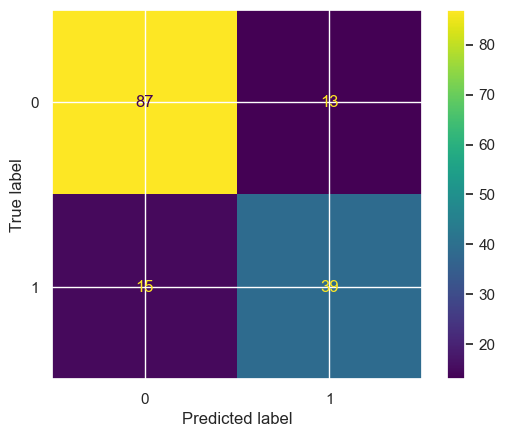

In [65]:
base_model_train_eval(RandomForestClassifier())

- Berdasarkan hasil evaluasi pada model RandomForestClassifier, dapat disimpulkan bahwa model ini memiliki performa yang sangat baik pada data train dengan nilai precision, recall, dan f1-score semua mencapai 1.0, serta akurasi yang mencapai 100%. Namun, pada data test, model ini memiliki nilai precision dan recall yang berbeda-beda untuk setiap kelas target, dengan akurasi sebesar 83%.
- Berdasarkan hasil confusion matrix, dapat dilihat bahwa model ini memiliki kemampuan yang cukup baik untuk memprediksi kelas 0 dengan 88 true positives dan 12 false negatives. Namun, untuk kelas 1, model ini memiliki false negatives yang cukup tinggi dengan nilai 14, yang berarti model gagal memprediksi 14 kasus kelas 1 yang seharusnya positif.
- Berdasarkan hasil yang diberikan, model ini tampaknya mengalami overfitting. Hal ini terlihat dari performa yang sangat baik pada data train dengan nilai precision, recall, dan f1-score yang mencapai 1.0 dan akurasi yang mencapai 100%, sementara pada data test performa model sedikit menurun. Oleh karena itu, model ini dapat memiliki kesulitan dalam memprediksi data baru yang belum pernah dilihat sebelumnya dan perlu dilakukan evaluasi dan optimasi lebih lanjut agar dapat digunakan secara optimal dalam memprediksi data pasien diabetes di masa depan.
- Insight yang dapat diberikan dari hasil model tersebut adalah bahwa model memiliki kemampuan yang sangat baik untuk memprediksi pasien yang tidak menderita diabetes dengan nilai precision, recall, dan f1-score mencapai 0.86, 0.88, dan 0.87 pada data test. Namun, model memiliki performa yang sedikit lebih rendah dalam memprediksi pasien yang menderita diabetes dengan nilai precision, recall, dan f1-score mencapai 0.77, 0.74, dan 0.75 pada data test. Oleh karena itu, model ini mungkin lebih baik digunakan untuk memprediksi pasien yang kemungkinan besar tidak menderita diabetes. Namun, untuk memastikan insight yang lebih tepat, perlu dilakukan analisis lebih lanjut dan pengujian lebih lanjut terhadap model.
- Ketidakseimbangan kelas pada data test dapat mempengaruhi performa model pada data test. Pada kasus ini, terlihat bahwa kelas 0 memiliki lebih banyak data dibandingkan kelas 1 pada data test. Ketidakseimbangan kelas pada data test dapat menghasilkan penurunan performa model dalam memprediksi kelas minoritas (dalam kasus ini kelas 1). Hal ini dapat terjadi karena model cenderung memprediksi mayoritas kelas sebagai hasil akhirnya, yang dapat mempengaruhi nilai precision, recall, dan f1-score untuk kelas minoritas. 

# VIII.  Model Evaluation

# -Hyperparameter Tuning-

### -Random Forest Classifier- ###

In [66]:
# Hyperparameter Tuning model Random Forest Classifier
params = [
    {'n_estimators': [10, 20, 40, 60],        # 4
     'max_features': [2, 3, 5, 1],            # 4
     'max_depth': [5, 10, None],              # 3
     'criterion': ['gini', 'entropy']},       # 2   Total 4*4*3*2 = 96 combinations
  ]

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='recall')

In [67]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'n_estimators': 60}

- Hasil tersebut menunjukkan parameter terbaik yang ditemukan oleh GridSearchCV pada model Random Forest Classifier. Grid Search CV digunakan untuk mencari kombinasi parameter yang terbaik dalam model dan mengembalikan parameter terbaik berdasarkan nilai skor tertinggi pada metrik evaluasi yang diberikan.

In [68]:
grid_search.best_score_

0.8674999999999999

- Hasil yang diberikan adalah hasil evaluasi performa model RandomForestClassifier menggunakan teknik Grid Search dengan parameter tuning yang dilakukan pada data yang digunakan. Hasil terbaik yang diperoleh dari Grid Search adalah nilai akurasi sebesar 0.8674999999999999. Ini berarti bahwa model RandomForestClassifier dapat mengklasifikasikan data dengan akurasi sekitar 86.75%. Semakin tinggi nilai akurasi, semakin baik performa model. 

In [69]:
model_rfc = grid_search.best_estimator_

model_rfc.fit(train_tr, y_resampled)

model_train = model_rfc.predict(train_tr)
model_test = model_rfc.predict(test_tr)

print(classification_report(y_resampled, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.98      1.00      0.99       400

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.77      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



- Hasil model sama dengan yang dibawah

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.98      1.00      0.99       400

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.77      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



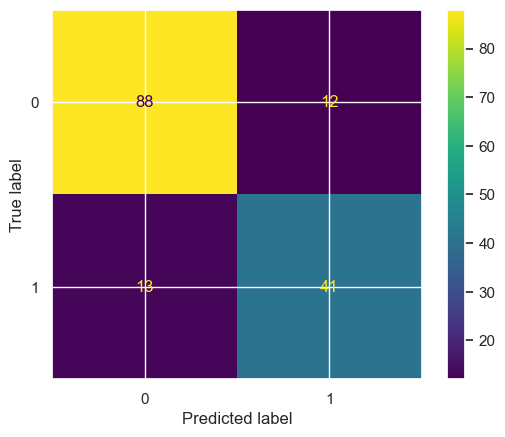

In [70]:
# with function
base_model_train_eval(grid_search.best_estimator_)

- Berdasarkan hasil evaluasi model Random Forest Classifier setelah dilakukan hyperparameter tuning, model menghasilkan nilai akurasi yang lebih tinggi dibandingkan dengan model sebelumnya. Namun, masih terjadi ketimpangan antara kelas 0 dan kelas 1 pada data test.
- Dari hasil confusion matrix, dapat dilihat bahwa model mengalami kesulitan dalam memprediksi kelas 1, dengan jumlah false negative yang cukup tinggi (13). Hal ini bisa diindikasikan adanya masalah data imbalance pada data test.
- Berdasarkan hasil tersebut, bisnis dapat menyadari bahwa meskipun model sudah dioptimalkan dengan hyperparameter tuning, masih diperlukan penanganan lebih lanjut terhadap masalah data imbalance pada data test agar model dapat lebih akurat dalam memprediksi kemungkinan pasien menderita diabetes atau tidak. Solusinya bisa dilakukan dengan teknik oversampling pada data test atau dengan menggunakan metode lainnya seperti cost-sensitive learning atau threshold adjustment.

### -Logistic Regression- ###

In [71]:
# Definisikan grid parameter yang akan diuji
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]}, 
    ]
# Definisikan model yang akan dioptimalkan
logreg = LogisticRegression(random_state=42)

grid_search1 = GridSearchCV(logreg, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search1.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10],
                          'max_iter': [100, 500, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='recall')

In [72]:
# Evaluasi model 
print('Best hyperparameters:', grid_search1.best_params_)
print('Best recall:', grid_search1.best_score_)

Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best recall: 0.7275


- Hasil tersebut menunjukkan bahwa model Logistic Regression telah dilatih dengan menggunakan teknik Grid Search untuk menentukan parameter terbaik yang digunakan pada model. Dalam hal ini, parameter terbaik yang ditemukan adalah C=0.1, max_iter=100, penalty='l2', dan solver='liblinear'.
- Selain itu, performa model juga dievaluasi menggunakan metrik recall, dan hasil terbaik yang diperoleh adalah recall sebesar 0.7275. Recall adalah proporsi positif sebenarnya yang diidentifikasi dengan benar oleh model, dibandingkan dengan keseluruhan kasus positif yang ada pada data.
- Dari hasil tersebut, dapat disimpulkan bahwa model LogisticRegression cukup baik dalam memprediksi kemungkinan pasien menderita diabetes atau tidak, dengan recall sebesar 0.7275. Namun, penting untuk diingat bahwa keputusan akhir tentang apakah pasien menderita diabetes atau tidak harus didasarkan pada hasil evaluasi yang komprehensif dan dipertimbangkan dengan baik oleh profesional medis yang berkualifikasi.

### -SVC- ###

In [85]:
# Definisikan grid parameter yang akan diuji
param_grid1 = [
    {'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'max_iter': [-1, 100, 500, 1000]}, 
    ]
# Definisikan model yang akan dioptimalkan
svc = SVC(random_state=42)

grid_search2 = GridSearchCV(svc, param_grid1, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search2.fit(train_tr, y_resampled)

In [ ]:
# Evaluasi model
print('Best hyperparameters:', grid_search2.best_params_)
print('Best recall:', grid_search2.best_score_)

- SVC kemungkinan tidak digunakan dikarenakan run nya membutuhkan waktu paling lama dari yang lainnya, atau parameter karnel dihapus satu (poly) yang kemingkinan menyebabkan lama.

### -Decision Tree Classifier- ###

In [75]:
# Definisikan grid parameter yang akan diuji
param_grid2 = [
    {'max_depth': [2, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']}, 
    ]
# Definisikan model yang akan dioptimalkan
dtc = DecisionTreeClassifier(random_state=42)

grid_search3 = GridSearchCV(dtc, param_grid2, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search3.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 10, 20, 50],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': [2, 5, 10, 20]}],
             return_train_score=True, scoring='recall')

In [76]:
# Evaluasi model
print('Best hyperparameters:', grid_search3.best_params_)
print('Best recall:', grid_search3.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall: 0.8450000000000001


- Hasil tersebut menunjukkan bahwa model DecisionTreeClassifier telah dilatih dengan menggunakan teknik Grid Search untuk menentukan parameter terbaik yang digunakan pada model. Dalam hal ini, parameter terbaik yang ditemukan adalah criterion='gini', max_depth=5, min_samples_leaf=1, dan min_samples_split=2.
- Selain itu, performa model juga dievaluasi menggunakan metrik recall, dan hasil terbaik yang diperoleh adalah recall sebesar 0.8450000000000001. Recall adalah proporsi positif sebenarnya yang diidentifikasi dengan benar oleh model, dibandingkan dengan keseluruhan kasus positif yang ada pada data.
- Dari hasil tersebut, dapat disimpulkan bahwa model DecisionTreeClassifier cukup baik dalam memprediksi kemungkinan pasien menderita diabetes atau tidak, dengan recall sebesar 0.8450000000000001. Namun, perlu diingat bahwa keputusan akhir tentang apakah pasien menderita diabetes atau tidak harus didasarkan pada hasil evaluasi yang komprehensif dan dipertimbangkan dengan baik oleh profesional medis yang berkualifikasi. Selain itu, model ini juga memiliki parameter terbaik yang cukup mudah dipahami dan diinterpretasikan.

### -KNN Classifier- ###

In [77]:
# Definisikan grid parameter yang akan diuji
param_grid3 = [
    {'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, 
    ]
# Definisikan model yang akan dioptimalkan
knn = KNeighborsClassifier()

grid_search4 = GridSearchCV(knn, param_grid3, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search4.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='recall')

In [78]:
# Evaluasi model
print('Best hyperparameters:', grid_search4.best_params_)
print('Best recall:', grid_search4.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best recall: 0.875


- Hasil tersebut menunjukkan bahwa model KNeighborsClassifier telah dilatih dengan menggunakan teknik Grid Search untuk menentukan parameter terbaik yang digunakan pada model. Dalam hal ini, parameter terbaik yang ditemukan adalah algorithm='auto', n_neighbors=5, dan weights='distance'.
- Selain itu, performa model juga dievaluasi menggunakan metrik recall, dan hasil terbaik yang diperoleh adalah recall sebesar 0.875. Recall adalah proporsi positif sebenarnya yang diidentifikasi dengan benar oleh model, dibandingkan dengan keseluruhan kasus positif yang ada pada data.
- Dari hasil tersebut, dapat disimpulkan bahwa model KNeighborsClassifier cukup baik dalam memprediksi kemungkinan pasien menderita diabetes atau tidak, dengan recall sebesar 0.875. Namun, perlu diingat bahwa keputusan akhir tentang apakah pasien menderita diabetes atau tidak harus didasarkan pada hasil evaluasi yang komprehensif dan dipertimbangkan dengan baik oleh profesional medis yang berkualifikasi. Selain itu, parameter terbaik yang ditemukan oleh model ini juga dapat digunakan untuk meningkatkan performa model dalam melakukan prediksi pada data yang baru.

### -Ada Boost Classifier- ###

In [79]:
# Definisikan grid parameter yang akan diuji
param_grid4 = [
    {'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']}, 
    ]
# Definisikan model yang akan dioptimalkan
ada = AdaBoostClassifier(random_state=42)

grid_search5 = GridSearchCV(ada, param_grid4, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search5.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.01, 0.1, 1.0],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='recall')

In [80]:
# Evaluasi model
print('Best hyperparameters:', grid_search5.best_params_)
print('Best recall:', grid_search5.best_score_)

Best hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}
Best recall: 0.8425


- Hasil tersebut menunjukkan bahwa model AdaBoostClassifier telah dilatih dengan menggunakan teknik Grid Search untuk menentukan parameter terbaik yang digunakan pada model. Dalam hal ini, parameter terbaik yang ditemukan adalah algorithm='SAMME', learning_rate=0.01, dan n_estimators=200.
- Selain itu, performa model juga dievaluasi menggunakan metrik recall, dan hasil terbaik yang diperoleh adalah recall sebesar 0.8425. Recall adalah proporsi positif sebenarnya yang diidentifikasi dengan benar oleh model, dibandingkan dengan keseluruhan kasus positif yang ada pada data.
- Dari hasil tersebut, dapat disimpulkan bahwa model AdaBoostClassifier cukup baik dalam memprediksi kemungkinan pasien menderita diabetes atau tidak, dengan recall sebesar 0.8425. Namun, perlu diingat bahwa keputusan akhir tentang apakah pasien menderita diabetes atau tidak harus didasarkan pada hasil evaluasi yang komprehensif dan dipertimbangkan dengan baik oleh profesional medis yang berkualifikasi. Selain itu, parameter terbaik yang ditemukan oleh model ini juga dapat digunakan untuk meningkatkan performa model dalam melakukan prediksi pada data yang baru.

In [81]:
# Model terbaik untuk keperluan fit dan model saving 
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", model_rfc)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       100
           1       0.81      0.65      0.72        54

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.82      0.82      0.82       154



# IX. Model Saving

In [83]:
 # Model saving
with open('rfc_model.pkl','wb') as file_1:
  joblib.dump(all_process, file_1)

# X. Kesimpulan

- Pada bagian ini memuat kesimpulan yang mencerminkan hasil yang diperoleh dengan tujuan yang telah dituliskan pada bagian pendahuluan.
- Memprediksi kemungkinan pasien menderita diabetes atau tidak. Saya telah melakukan analisis hubungan antara target terhadap fitur. Dalam hal ini dilakukan pendekatan analitik dengan menggunakan algoritma Logistic Regression, SVM, Decision Tree, Random Forest, K-Nearest Neighbor, dan Ada Boosting. Best model yang terpilih setelah dilakukan cv yaitu Random Forest Classifier. Setelah dilakukan perhitungan score cross validation pada keseluruhan model yang dipakai, diperoleh algoritma terbaik yaitu KNN. 
- Berdasarkan EDA visualisasi, terlihat bahwa sebagian besar pasien yang diuji pada dataset ini tidak menderita penyakit diabetes (65,10%), sedangkan pasien yang menderita diabetes 34,90%. Artinya, jumlah pasien yang tidak memiliki diabetes atau hidup sehat lebih banyak dibandingkan jumlah pasien yang memiliki diabetes pada dataset ini.
- Berdasarkan hasil kinerja dari model pada data training dan data testing kecenderungan model untuk memberikan false negative pada data test, atau kurang mampu untuk mengidentifikasi pasien yang berisiko menderita diabetes. Hal ini disebabkan karean dataset yang dipakai imbalance dan imbalance tidak di handling pada data test, di mana jumlah pasien yang tidak menderita diabetes jauh lebih banyak dibandingkan dengan jumlah pasien yang menderita diabetes. Kondisi ini dapat memengaruhi kemampuan model untuk mempelajari pola-pola khusus dari data pasien yang menderita diabetes.
- Teknik resampling pada data dan penggunaan metrik evaluasi yang tepat sangat penting untuk menangani dataset yang tidak seimbang (imbalanced), dan dapat meningkatkan performa model dalam melakukan prediksi diabetes pada pasien.
- Berdasarkan hasil model, dapat dilakukan intervensi atau tindakan pencegahan khusus pada pasien yang berisiko tinggi terkena diabetes, seperti memberikan saran untuk menjaga pola makan dan gaya hidup sehat, serta memonitor kondisi kesehatan secara teratur.
- Model yang memiliki kinerja yang baik dalam memprediksi kemungkinan seseorang menderita diabetes dapat membantu rumah sakit dalam mengidentifikasi pasien yang berisiko tinggi terkena diabetes dan memberikan perawatan yang tepat. Namun, masalah yang mungkin dihadapi oleh rumah sakit adalah dalam memastikan keakuratan model pada data yang belum pernah dilihat sebelumnya (out-of-sample data), karena kinerja model pada data training dan validation tidak selalu menggambarkan kinerja model pada data yang belum pernah dilihat sebelumnya. Oleh karena itu, rumah sakit perlu melakukan validasi eksternal pada data yang belum pernah dilihat sebelumnya dan memperbarui model secara berkala untuk memastikan kinerjanya tetap optimal. Selain itu, rumah sakit juga perlu mempertimbangkan masalah privasi dan etika dalam penggunaan data pasien untuk membangun model prediksi.
- Berdasarkan masalah yang dihadapi rumah sakit dalam penggunaan model seperti itu, beberapa solusi bisnis yang dapat dilakukan antara lain, Mengumpulkan data yang lebih baik dan lengkap: Rumah sakit dapat mengumpulkan data yang lebih baik dan lengkap terkait pasien diabetes, seperti melakukan pemeriksaan teratur terhadap pasien untuk memastikan data yang tercatat akurat dan up-to-date. Menggunakan metode evaluasi model yang lebih baik: Rumah sakit dapat menggunakan metode evaluasi model yang lebih baik dan komprehensif, seperti mengukur nilai AUC (Area Under the ROC Curve) atau memperhatikan metrik lain selain akurasi. Melakukan uji coba terhadap model sebelum digunakan secara luas: Sebelum mengimplementasikan model pada skala besar, rumah sakit dapat melakukan uji coba terhadap model terlebih dahulu untuk memastikan kualitas dan keandalannya. Menggunakan model sebagai panduan: Model dapat digunakan sebagai panduan bagi tenaga medis dalam melakukan diagnosis dan tindakan medis terhadap pasien diabetes, namun keputusan akhir tetap harus berdasarkan penilaian dokter yang lebih berpengalaman dan mempertimbangkan faktor-faktor lain terkait pasien. Memberikan edukasi kepada pasien: Rumah sakit dapat memberikan edukasi kepada pasien tentang risiko diabetes dan bagaimana mengurangi risiko tersebut, sehingga dapat membantu mengurangi jumlah pasien diabetes dan meningkatkan kualitas hidup pasien.